In [2]:
import duckdb
import pandas as pd
import numpy as np
train_path = 'data/train.parquet'

con = duckdb.connect()

# Define the number of samples you want per category (binders and non-binders) per protein
samples_per_category = 1000  # Adjust this number as needed, this is just an example for the tutorial. 
#Your real values should be higher than this for proper training.

def get_balanced_data_for_protein(file_path, protein, samples):
    """
    Fetches a balanced dataset for a specific protein.
    
    Parameters:
    - file_path: Path to the dataset file.
    - protein: The name of the protein.
    - samples: Number of samples per binder category (1 or 0).
    
    Returns:
    - A pandas DataFrame containing the balanced dataset for the protein.
    """
    query = f"""
    (SELECT * FROM parquet_scan('{file_path}')
     WHERE binds = 0 AND protein_name = '{protein}'
     ORDER BY random()
     LIMIT {samples})
    UNION ALL
    (SELECT * FROM parquet_scan('{file_path}')
     WHERE binds = 1 AND protein_name = '{protein}'
     ORDER BY random()
     LIMIT {samples})
    """
    return con.query(query).df()

# List of proteins to query for
proteins = ['sEH', 'BRD4', 'HSA']

# Creating a dictionary of dataframes, one for each protein
datasets = {}
for protein in proteins:
    datasets[protein] = get_balanced_data_for_protein(train_path, protein, samples_per_category)

# At this point, `datasets` contains separate dataframes for sEH, BRD4, and HSA
# For example, to access the dataset for sEH:
seh_df = datasets['sEH']

# And similarly for BRD4 and HSA
brd4_df = datasets['BRD4']
hsa_df = datasets['HSA']

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
'''We do a similar process to load in the test datasets, 
however this time we only filter for the proteins, and
we don't balance them'''
def get_data_for_protein(file_path, protein):
    """
    Fetches the dataset for a specific protein from the test dataset.
    
    Parameters:
    - file_path: Path to the dataset file.
    - protein: The name of the protein.
    
    Returns:
    - A pandas DataFrame containing the dataset for the protein.
    """
    query = f"""
    SELECT * FROM parquet_scan('{file_path}')
    WHERE protein_name = '{protein}'
    """
    return con.query(query).df()

test_path = 'data/test.parquet'

# Assuming the connection `con` to DuckDB is still open from the previous operations

# Creating a dictionary to store the filtered test datasets
test_datasets = {}
for protein in proteins:  # Using the same list of proteins: ['sEH', 'BRD4', 'HSA']
    test_datasets[protein] = get_data_for_protein(test_path, protein)

# At this point, `test_datasets` contains separate dataframes for sEH, BRD4, and HSA without balancing
# For example, to access the test dataset for sEH:
seh_test_df = test_datasets['sEH']

# And similarly for BRD4 and HSA
brd4_test_df = test_datasets['BRD4']
hsa_test_df = test_datasets['HSA']
con.close()

In [4]:
seh_df.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,144654119,O=C(Nc1c(Cl)c(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c...,Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,COC(=O)c1ccc2nc(N)sc2c1,COC(=O)c1ccc2nc(Nc3nc(Nc4cc(C(F)(F)F)cc(C(F)(F...,sEH,0
1,48845054,Cc1cc(Br)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O...,Nc1ccc(F)c([N+](=O)[O-])c1,CN(CCN)C1CCOCC1,Cc1cc(Br)c(Nc2nc(NCCN(C)C3CCOCC3)nc(Nc3ccc(F)c...,sEH,0
2,35814467,COc1ccc(C[C@H](NC(=O)OCC2c3ccccc3-c3ccccc32)C(...,Nc1ccc2c(c1)C(O)CCC2,NCCC(O)C1CCCC1,COc1ccc(C[C@H](Nc2nc(NCCC(O)C3CCCC3)nc(Nc3ccc4...,sEH,0
3,57690875,Cc1ccc(C[C@H](NC(=O)OCC2c3ccccc3-c3ccccc32)C(=...,Nc1nc(C2CC2)cs1,CNC(=O)c1cc(Oc2ccc(N)cc2)ccn1,CNC(=O)c1cc(Oc2ccc(Nc3nc(Nc4nc(C5CC5)cs4)nc(N[...,sEH,0
4,128791616,O=C(N[C@H]1C=C[C@@H](C(=O)O)C1)OCC1c2ccccc2-c2...,COc1cc(C#N)c(F)cc1N,CCn1nccc1CN,CCn1nccc1CNc1nc(Nc2cc(F)c(C#N)cc2OC)nc(N[C@H]2...,sEH,0


In [5]:
seh_test_df.head() #note we don't have a binds column here

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
1,295246835,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,sEH
2,295246838,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,sEH
3,295246841,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,sEH
4,295246844,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,sEH


In [6]:
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [7]:
# Atom Featurisation
## Auxiliary function for one-hot enconding transformation based on list of
##permitted values

def one_hot_encoding(x, permitted_list):
    """
    Maps input elements x which are not in the permitted list to the last element
    of the permitted list.
    """
    if x not in permitted_list:
        x = permitted_list[-1]
    binary_encoding = [int(boolean_value) for boolean_value in list(map(lambda s: x == s, permitted_list))]
    return binary_encoding
    
    
# Main atom feat. func

def get_atom_features(atom, use_chirality=True):
    # Define a simplified list of atom types
    permitted_atom_types = ['C', 'N', 'O', 'S', 'P', 'F', 'Cl', 'Br', 'I','Dy', 'Unknown']
    atom_type = atom.GetSymbol() if atom.GetSymbol() in permitted_atom_types else 'Unknown'
    atom_type_enc = one_hot_encoding(atom_type, permitted_atom_types)
    
    # Consider only the most impactful features: atom degree and whether the atom is in a ring
    atom_degree = one_hot_encoding(atom.GetDegree(), [0, 1, 2, 3, 4, 'MoreThanFour'])
    is_in_ring = [int(atom.IsInRing())]
    
    # Optionally include chirality
    if use_chirality:
        chirality_enc = one_hot_encoding(str(atom.GetChiralTag()), ["CHI_UNSPECIFIED", "CHI_TETRAHEDRAL_CW", "CHI_TETRAHEDRAL_CCW", "CHI_OTHER"])
        atom_features = atom_type_enc + atom_degree + is_in_ring + chirality_enc
    else:
        atom_features = atom_type_enc + atom_degree + is_in_ring
    
    return np.array(atom_features, dtype=np.float32)

In [8]:
# Bond featurization

def get_bond_features(bond):
    # Simplified list of bond types
    permitted_bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE, Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC, 'Unknown']
    bond_type = bond.GetBondType() if bond.GetBondType() in permitted_bond_types else 'Unknown'
    
    # Features: Bond type, Is in a ring
    features = one_hot_encoding(bond_type, permitted_bond_types) \
               + [int(bond.IsInRing())]
    
    return np.array(features, dtype=np.float32)

In [9]:
def create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles, ids, y=None):
    data_list = []
    
    for index, smiles in enumerate(x_smiles):
        mol = Chem.MolFromSmiles(smiles)
        
        if not mol:  # Skip invalid SMILES strings
            continue
        
        # Node features
        atom_features = [get_atom_features(atom) for atom in mol.GetAtoms()]
        x = torch.tensor(atom_features, dtype=torch.float)
        
        # Edge features
        edge_index = []
        edge_features = []
        for bond in mol.GetBonds():
            start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            edge_index += [(start, end), (end, start)]  # Undirected graph
            bond_feature = get_bond_features(bond)
            edge_features += [bond_feature, bond_feature]  # Same features in both directions
        
        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_features, dtype=torch.float)
        
        # Creating the Data object
        data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
        data.molecule_id = ids[index]
        if y is not None:
            data.y = torch.tensor([y[index]], dtype=torch.float)
        
        data_list.append(data)
    
    return data_list

In [10]:
from tqdm import tqdm
def featurize_data_in_batches(smiles_list, labels_list, batch_size):
    data_list = []
    # Define tqdm progress bar
    pbar = tqdm(total=len(smiles_list), desc="Featurizing data")
    for i in range(0, len(smiles_list), batch_size):
        smiles_batch = smiles_list[i:i+batch_size]
        labels_batch = labels_list[i:i+batch_size]
        ids_batch = ids_list[i:i+batch_size]
        batch_data_list = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(smiles_batch, ids_batch, labels_batch)
        data_list.extend(batch_data_list)
        pbar.update(len(smiles_batch))
        
    pbar.close()
    return data_list

In [11]:
# Define the batch size for featurization
batch_size = 256
# List of proteins and their corresponding dataframes
proteins_data = {
    'sEH': seh_df,
    'BRD4': brd4_df,
    'HSA': hsa_df
}
# Dictionary to store the featurized data for each protein
featurized_data = {}
# Loop over each protein and its dataframe
for protein_name, df in proteins_data.items():
    print(f"Processing {protein_name}...")
    smiles_list = df['molecule_smiles'].tolist()
    ids_list = df['id'].tolist()
    labels_list = df['binds'].tolist()
 # Featurize the data
    featurized_data[protein_name] = featurize_data_in_batches(smiles_list, labels_list, batch_size)
    

seh_train_data = featurized_data['sEH']
brd4_train_data = featurized_data['BRD4']
hsa_train_data = featurized_data['HSA']

Processing sEH...


Featurizing data:   0%|          | 0/2000 [00:00<?, ?it/s]C:\Users\PC\AppData\Local\Temp\ipykernel_11576\29676016.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:264.)
  x = torch.tensor(atom_features, dtype=torch.float)
Featurizing data: 100%|██████████| 2000/2000 [00:01<00:00, 1146.17it/s]


Processing BRD4...


Featurizing data: 100%|██████████| 2000/2000 [00:01<00:00, 1112.20it/s]


Processing HSA...


Featurizing data: 100%|██████████| 2000/2000 [00:01<00:00, 1153.74it/s]


In [12]:
# batch_size = 256
# smiles_list  = brd4_test_df['molecule_smiles'].tolist()
# ids_list = brd4_test_df['id'].tolist()
# labels_list = [-1]*len(smiles_list) #we dont have the actual labels, so we assign some dummy label list for the function. (don't choose 0 or 1)
# brd4_test_data = featurize_data_in_batches(smiles_list, labels_list, batch_size)

In [13]:
# batch_size = 2**8
# smiles_list  = seh_test_df['molecule_smiles'].tolist()
# ids_list = seh_test_df['id'].tolist()
# labels_list = [-1]*len(smiles_list)
# seh_test_data = featurize_data_in_batches(smiles_list, labels_list, batch_size)

In [14]:
# batch_size = 2**8
# smiles_list  = hsa_test_df['molecule_smiles'].tolist()
# ids_list = hsa_test_df['id'].tolist()
# labels_list = [-1]*len(smiles_list)
# hsa_test_data = featurize_data_in_batches(smiles_list, labels_list, batch_size)

In [15]:
import pickle
brd4_test_data = []
seh_test_data = []
hsa_test_data = []
# 保存数据为 Pickle 格式
def save_data_as_pickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)  # 使用 pickle.dump 保存数据
    print(f"Data saved to {filename}")

# 假设 brd4_test_data, seh_test_data, hsa_test_data 是需要保存的数据
# save_data_as_pickle(brd4_test_data, 'output/brd4_test_data.pkl')
# save_data_as_pickle(seh_test_data, 'output/seh_test_data.pkl')
# save_data_as_pickle(hsa_test_data, 'output/hsa_test_data.pkl')


In [16]:
import pickle

# 读取数据从 Pickle 文件
def load_data_from_pickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)  # 使用 pickle.load 读取数据
    print(f"Data loaded from {filename}")
    return data

# 读取数据
brd4_test_data = load_data_from_pickle('output/brd4_test_data.pkl')
seh_test_data = load_data_from_pickle('output/seh_test_data.pkl')
hsa_test_data = load_data_from_pickle('output/hsa_test_data.pkl')

Data loaded from output/brd4_test_data.pkl
Data loaded from output/seh_test_data.pkl
Data loaded from output/hsa_test_data.pkl


In [17]:
seh_test_data[0] #example of what a pytorch object looks like

Data(x=[35, 22], edge_index=[2, 74], edge_attr=[74, 6], molecule_id=295246832, y=[1])

In [18]:
featurized_data_train = {
    'sEH': seh_train_data,
    'BRD4': brd4_train_data,
    'HSA': hsa_train_data
}

featurized_data_test = {
    'sEH': seh_test_data,
    'BRD4': brd4_test_data,
    'HSA': hsa_test_data
}

In [19]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool, global_max_pool
from torch.nn import BCEWithLogitsLoss
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import numpy as np

#Define custom GNN layer
class CustomGNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(CustomGNNLayer, self).__init__(aggr='max')
        self.lin = nn.Linear(in_channels + 6, out_channels)

    def forward(self, x, edge_index, edge_attr):
        # Start propagating messages
        return MessagePassing.propagate(self, edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        combined = torch.cat((x_j, edge_attr), dim=1)
        return combined

    def update(self, aggr_out):
        return self.lin(aggr_out)

#Define GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_rate):
        super(GNNModel, self).__init__()
        self.num_layers = num_layers
        self.convs = nn.ModuleList([CustomGNNLayer(input_dim if i == 0 else hidden_dim, hidden_dim) for i in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)
        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])
        self.lin = nn.Linear(hidden_dim, 1)
        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        features = []  # To store the intermediate features
        
        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index, edge_attr)
            x = self.bns[i](x)
            x = F.relu(x)
            x = self.dropout(x)
            
        
        x = global_max_pool(x, data.batch)  # Global pooling to get a graph-level representation
        features.append(x)  # Store features from each layer
        x = self.lin(x)
        
        return x, features  # Return both the final output and features

In [23]:
from sklearn.metrics import accuracy_score

def train_model(train_loader, num_epochs, input_dim, hidden_dim, num_layers, dropout_rate, lr):
    model = GNNModel(input_dim, hidden_dim, num_layers, dropout_rate)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = BCEWithLogitsLoss()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        for batch in train_loader:
            optimizer.zero_grad()
            out, _ = model(batch)
            loss = criterion(out, batch.y.view(-1, 1).float())
            loss.backward()
            optimizer.step()
            
            # Collect predictions and true labels for accuracy calculation
            preds = torch.sigmoid(out).round()  # Apply sigmoid and round to 0 or 1
            all_preds.extend(preds.detach().cpu().numpy())  # Move predictions to CPU
            all_labels.extend(batch.y.view(-1, 1).cpu().numpy())  # True labels
            
            total_loss += loss.item()
        
        # Calculate accuracy at the end of the epoch
        acc = accuracy_score(all_labels, all_preds)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader)}, Accuracy: {acc}')
    
    return model

def predict_with_model(model, test_loader):
    model.eval()
    predictions = []
    molecule_ids = []

    with torch.no_grad():
        for data in test_loader:
            out, _ = model(data)
            output = torch.sigmoid(out)
            predictions.extend(output.view(-1).tolist())
            molecule_ids.extend(data.molecule_id)

    return molecule_ids, predictions



In [24]:
# 保存模型的参数
def save_model(model, filename):
    torch.save(model.state_dict(), filename)
    print(f"Model saved to {filename}")

# 加载模型的参数
def load_model(model, filename):
    model.load_state_dict(torch.load(filename))
    model.eval()  # 切换到评估模式
    print(f"Model loaded from {filename}")
    return model

In [25]:
from torch_geometric.loader import DataLoader
model_filename = f"ckpoint/GNN/gnn_model.pth"
# Other setup remains the same as before
proteins = ['sEH', 'BRD4', 'HSA']
all_predictions = []

for protein in proteins:
    print(f"Training and predicting for {protein}")
    
    # Create DataLoaders for the current protein
    train_loader = DataLoader(featurized_data_train[protein], batch_size=32, shuffle=True)
    test_loader = DataLoader(featurized_data_test[protein], batch_size=32, shuffle=False)
    
    # Train model
    input_dim = train_loader.dataset[0].num_node_features
    hidden_dim = 64
    num_epochs = 21
    num_layers = 4 #Should ideally be set so that all nodes can communicate with each other
    dropout_rate = 0.2
    lr = 0.001
    #These are just example values, feel free to play around with them.
    model = train_model(train_loader,num_epochs, input_dim, hidden_dim,num_layers, dropout_rate, lr)
    
    # Predict
    molecule_ids, predictions = predict_with_model(model, test_loader)
    
    # Collect predictions
    protein_predictions = pd.DataFrame({
        'id': molecule_ids,
        'binds': predictions,
    })
    all_predictions.append(protein_predictions)


save_model(model, model_filename)  # 保存训练后的模型



# Train model
input_dim = train_loader.dataset[0].num_node_features
hidden_dim = 64
num_epochs = 21
num_layers = 4 #Should ideally be set so that all nodes can communicate with each other
dropout_rate = 0.3
lr = 0.001
model = GNNModel(input_dim, hidden_dim, num_layers, dropout_rate)
model = load_model(model, model_filename)






Training and predicting for sEH
Epoch 1/21, Loss: 0.7507334526569124, Accuracy: 0.664
Epoch 2/21, Loss: 0.4699955071721758, Accuracy: 0.783
Epoch 3/21, Loss: 0.4350754538225749, Accuracy: 0.7945
Epoch 4/21, Loss: 0.4043125609556834, Accuracy: 0.8165
Epoch 5/21, Loss: 0.38713090996893623, Accuracy: 0.8245
Epoch 6/21, Loss: 0.3753160907635613, Accuracy: 0.826
Epoch 7/21, Loss: 0.3478768699698978, Accuracy: 0.8455
Epoch 8/21, Loss: 0.3350120617283715, Accuracy: 0.852
Epoch 9/21, Loss: 0.32196939559209914, Accuracy: 0.87
Epoch 10/21, Loss: 0.3086670885483424, Accuracy: 0.873
Epoch 11/21, Loss: 0.28771299289332497, Accuracy: 0.879
Epoch 12/21, Loss: 0.28940805993855945, Accuracy: 0.876
Epoch 13/21, Loss: 0.2710217237472534, Accuracy: 0.8915
Epoch 14/21, Loss: 0.2650149980234721, Accuracy: 0.8925
Epoch 15/21, Loss: 0.24939260750062883, Accuracy: 0.895
Epoch 16/21, Loss: 0.2633797883514374, Accuracy: 0.89
Epoch 17/21, Loss: 0.2491747715643474, Accuracy: 0.897
Epoch 18/21, Loss: 0.249635479752

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def get_features(model, loader, label=None):
    model.eval()
    all_features = []
    all_labels = []  # Only for training, for plotting labels
    molecule_ids = []
    
    with torch.no_grad():
        for data in loader:
            # Get features from the model
            output, features = model(data)
            # print(len(output))
            # print(len(features))
            all_features.append(features[0].cpu().numpy())  # Take the last layer's features (or you can try other layers)
            
            # For training, store labels
            if label is not None:
                all_labels.extend(data.y.cpu().numpy())  # Store the true labels
            
            molecule_ids.extend(data.molecule_id)

            # break
    
    all_features = np.concatenate(all_features, axis=0)
    if label is not None:
        return all_features, np.array(all_labels), molecule_ids
    else:
        return all_features, molecule_ids

In [27]:
# Get training data features and labels
train_features, train_labels, train_ids = get_features(model, train_loader, label=True)
# train_features = train_features[:train_labels.shape[0]]
train_features = train_features[:train_labels.shape[0]]
print(train_features.shape)
print(train_labels.shape)


(2000, 64)
(2000,)


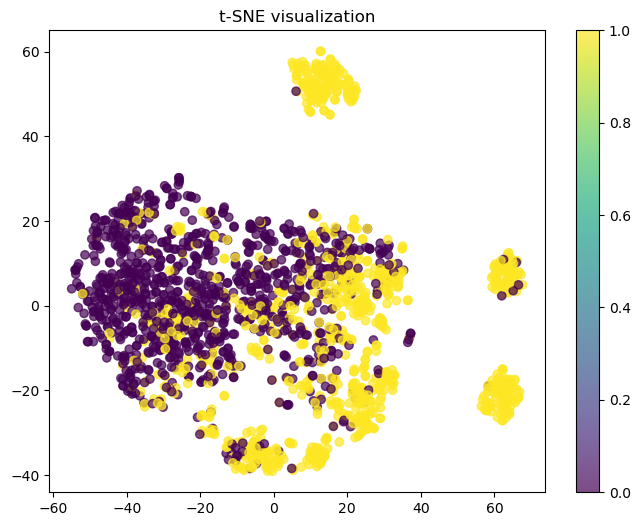

In [28]:
# Train set t-SNE visualization with labels
def plot_tsne(features, labels, title="t-SNE visualization"):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

plot_tsne(train_features, train_labels)

In [29]:
# Combine all predictions into one DataFrame
final_predictions = pd.concat(all_predictions, ignore_index=True)
# Convert 'molecule_id' from tensors to integers directly within the DataFrame
final_predictions['id'] = final_predictions['id'].apply(lambda x: x.item())

# Now save the modified DataFrame to a CSV file
final_predictions.to_csv('final_predictions.csv', index=False)

In [30]:
final_predictions.head()

,id,binds
0,295246832,0.509144
1,295246835,0.460298
2,295246838,0.445776
3,295246841,0.410928
4,295246844,0.760987


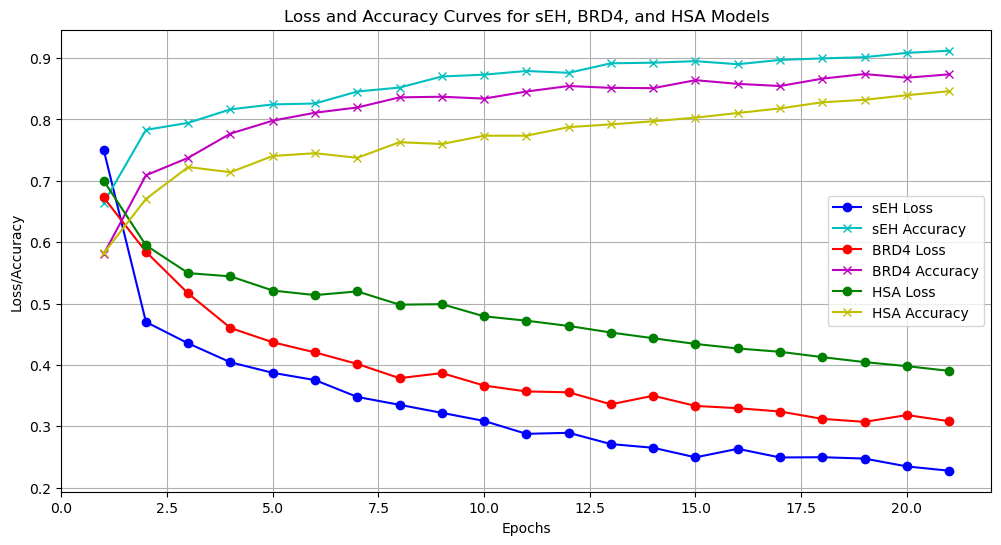

In [31]:
import matplotlib.pyplot as plt

# 训练日志的损失值和准确度（以sEH、BRD4、HSA为例）
# 示例数据，实际使用时请用实际训练的结果替换这些值
sEH_loss = [0.7507, 0.4700, 0.4351, 0.4043, 0.3871, 0.3753, 0.3478, 0.3350, 0.3219, 0.3087, 0.2877, 0.2894, 0.2710, 0.2650, 0.2494, 0.2633, 0.2492, 0.2496, 0.2474, 0.2346, 0.2276]
sEH_acc = [0.664, 0.783, 0.7945, 0.8165, 0.8245, 0.826, 0.8455, 0.852, 0.87, 0.873, 0.879, 0.876, 0.8915, 0.8925, 0.895, 0.89, 0.897, 0.8995, 0.9015, 0.9085, 0.912]

BRD4_loss = [0.6729, 0.5844, 0.5164, 0.4602, 0.4369, 0.4204, 0.4016, 0.3784, 0.3867, 0.3664, 0.3568, 0.3554, 0.3358, 0.3498, 0.3332, 0.3295, 0.3241, 0.3121, 0.3072, 0.3183, 0.3083]
BRD4_acc = [0.5805, 0.709, 0.7375, 0.777, 0.798, 0.811, 0.8195, 0.836, 0.837, 0.834, 0.8455, 0.8545, 0.8515, 0.851, 0.864, 0.858, 0.8545, 0.8665, 0.874, 0.868, 0.8735]

HSA_loss = [0.7002, 0.5949, 0.5496, 0.5443, 0.5212, 0.5138, 0.5198, 0.4982, 0.4990, 0.4792, 0.4721, 0.4635, 0.4528, 0.4435, 0.4342, 0.4268, 0.4214, 0.4127, 0.4046, 0.3980, 0.3903]
HSA_acc = [0.582, 0.6705, 0.7225, 0.714, 0.7405, 0.745, 0.7375, 0.763, 0.760, 0.7735, 0.7735, 0.7875, 0.792, 0.797, 0.803, 0.8105, 0.818, 0.828, 0.832, 0.8395, 0.846]

# 设置画布和子图
plt.figure(figsize=(12, 6))

# 绘制sEH的损失曲线
plt.plot(range(1, 22), sEH_loss, label="sEH Loss", color='b', marker='o')
plt.plot(range(1, 22), sEH_acc, label="sEH Accuracy", color='c', marker='x')

# 绘制BRD4的损失曲线
plt.plot(range(1, 22), BRD4_loss, label="BRD4 Loss", color='r', marker='o')
plt.plot(range(1, 22), BRD4_acc, label="BRD4 Accuracy", color='m', marker='x')

# 绘制HSA的损失曲线
plt.plot(range(1, 22), HSA_loss, label="HSA Loss", color='g', marker='o')
plt.plot(range(1, 22), HSA_acc, label="HSA Accuracy", color='y', marker='x')

# 添加标题和标签
plt.title('Loss and Accuracy Curves for sEH, BRD4, and HSA Models')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')

# 添加图例
plt.legend()

# 显示图形
plt.grid(True)
plt.show()
